# Synthetic data example
In this note, we plot results from a synthetic data example, with unmeasured confounding. We use this to motivate our methodology

In [622]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [623]:
beta_1 = 3
beta_2 = 1

def x_t(a_t, x_prev, u, t):
    return x_prev + (a_t==1)*(beta_1*(u==1) + beta_2*(u==0)) + np.random.normal(-0.5, 1*(t/60), x_prev.shape[0])


In [624]:
def action(u):
    return np.random.binomial(1, 0.8, size=u.shape[0])*(u==1) + np.random.binomial(1, 0.001, size=u.shape[0])*(u==0)


In [625]:
data = pd.DataFrame()
n=100000
T = 61
data['U'] = np.random.binomial(1, 0.025, size=n)
data['X_0'] = np.random.normal(50, 1, size=n)

for t in range(1, T):
    if t < 31:
        data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
    if t == 31:
        data[f'A'] = action(np.array(data['U']))
    if t >= 31:
        data[f'X_{t}'] = x_t(a_t=np.array(data[f'A']), x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
        

In [626]:
data

,U,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60
0,0,52.051649,51.596108,51.093515,50.587755,50.043885,49.522704,49.087686,48.524800,48.028439,...,22.101893,22.395087,22.697984,21.969307,22.763065,21.188652,19.925397,19.544044,19.184801,18.820678
1,0,50.024395,49.504475,48.953130,48.487692,48.113171,47.621729,47.124561,46.587793,46.041780,...,28.901459,28.740858,29.026042,28.934834,27.848390,27.160963,27.292529,26.348271,27.196905,26.143763
2,0,50.635805,50.157457,49.683654,49.131470,48.723180,48.290598,47.683510,47.301863,46.880479,...,26.644604,25.576101,26.353605,24.416673,22.410023,21.688854,20.258532,19.694464,18.522175,17.499991
3,0,49.643639,49.136660,48.648010,48.181111,47.730922,47.210659,46.777954,46.427524,45.991818,...,30.651021,30.822617,31.078566,29.368521,29.990509,28.491526,26.680682,26.646804,24.881884,23.412744
4,0,48.831837,48.356207,47.904033,47.312437,46.863177,46.380081,45.618329,45.150873,44.673297,...,24.326274,21.827358,22.122763,21.367980,21.987084,21.505977,21.480641,20.663531,20.410645,20.261867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,49.796569,49.307637,48.821774,48.348922,47.918727,47.323098,46.899581,46.363638,45.891059,...,27.721815,27.887903,27.663046,26.426687,26.784851,27.038888,26.345882,25.694935,25.038989,24.096486
99996,0,52.175903,51.642082,51.159180,50.649610,50.215280,49.798582,49.243651,48.765788,48.239200,...,26.279634,24.649912,24.996288,23.948617,23.220873,23.251559,22.059227,23.533613,22.823373,21.429154
99997,0,50.570983,50.061329,49.576652,49.024586,48.569237,48.133277,47.494821,47.150114,46.536489,...,26.574558,26.352796,25.934913,24.413905,24.405513,23.668456,24.157890,24.733034,25.015863,23.267757
99998,0,48.641158,48.100870,47.585599,47.108741,46.575197,46.178024,45.612956,44.935657,44.401002,...,21.573001,19.481011,18.597301,18.788617,17.112631,15.296993,14.937554,12.765349,10.376163,10.510485


In [627]:
data_subset = data.loc[data['A']==1]

In [628]:
import matplotlib.pyplot as plt

In [629]:
mean_obs = [] 
q05_obs = []
q95_obs = []
for t in range(T):
    mean_obs.append(data_subset[f'X_{t}'].mean())
    q05_obs.append(data_subset[f'X_{t}'].quantile(0.05))
    q95_obs.append(data_subset[f'X_{t}'].quantile(0.95))

In [630]:
interventional_data = data.loc[:,['U', 'X_0']]

for t in range(1, T):
    if t < 31:
        interventional_data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
    if t == 31:
        interventional_data[f'A'] = 1
    if t >= 31:
        interventional_data[f'X_{t}'] = x_t(a_t=np.array(interventional_data[f'A']), x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
        

In [631]:
mean_int = [] 
q05_int = []
q95_int = []
for t in range(T):
    mean_int.append(interventional_data[f'X_{t}'].mean())
    q05_int.append(interventional_data[f'X_{t}'].quantile(0.05))
    q95_int.append(interventional_data[f'X_{t}'].quantile(0.95))

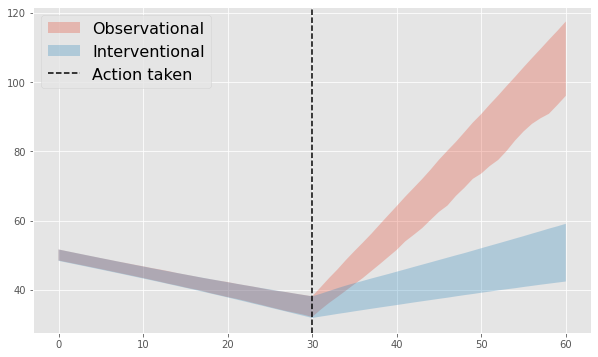

In [632]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.fill_between(range(T), q05_obs, q95_obs, alpha=0.3, label='Observational')
plt.fill_between(range(T), q05_int, q95_int, alpha=0.3, label='Interventional')
plt.axvline(30, color='k', linestyle='--', label='Action taken')
plt.legend(loc='upper left', fontsize=16)
